In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Assesment/salary_prediction_data.csv')

In [46]:
data.size #the size attribute is used to find out the total number of elements in the entire regression_df frame

7000

In [47]:
data.shape

(1000, 7)

In [48]:

data.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [50]:
data.isnull().sum()

,0
Education,0
Experience,0
Location,0
Job_Title,0
Age,0
Gender,0
Salary,0


In [51]:
data.dropna(inplace=True)

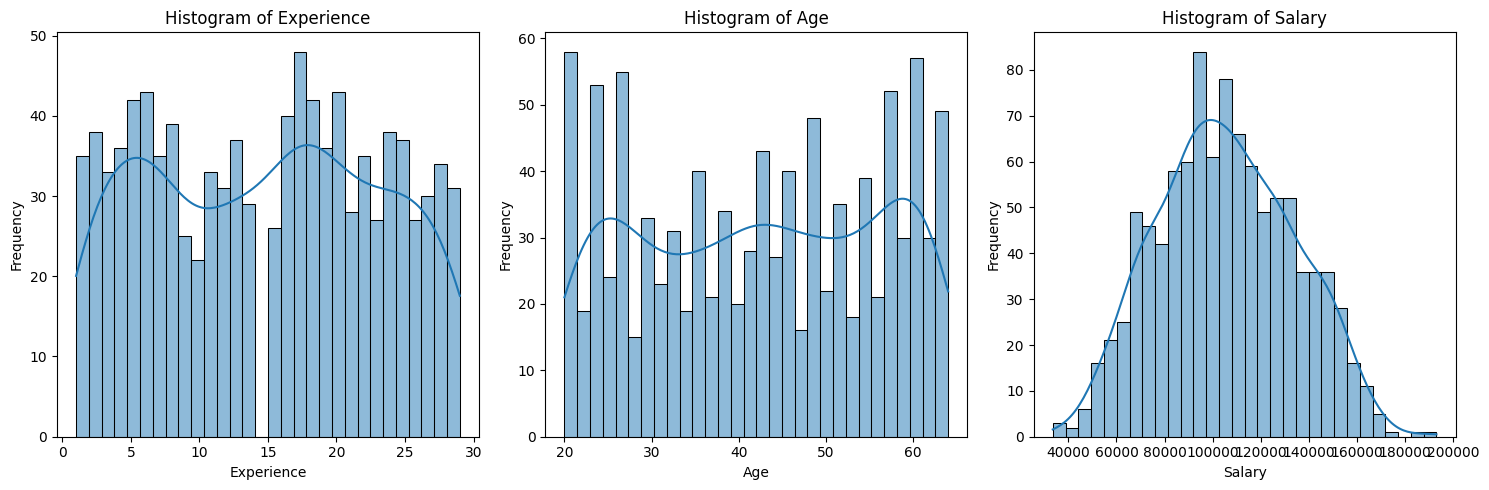

In [52]:
numerical_columns = ['Experience', 'Age', 'Salary']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

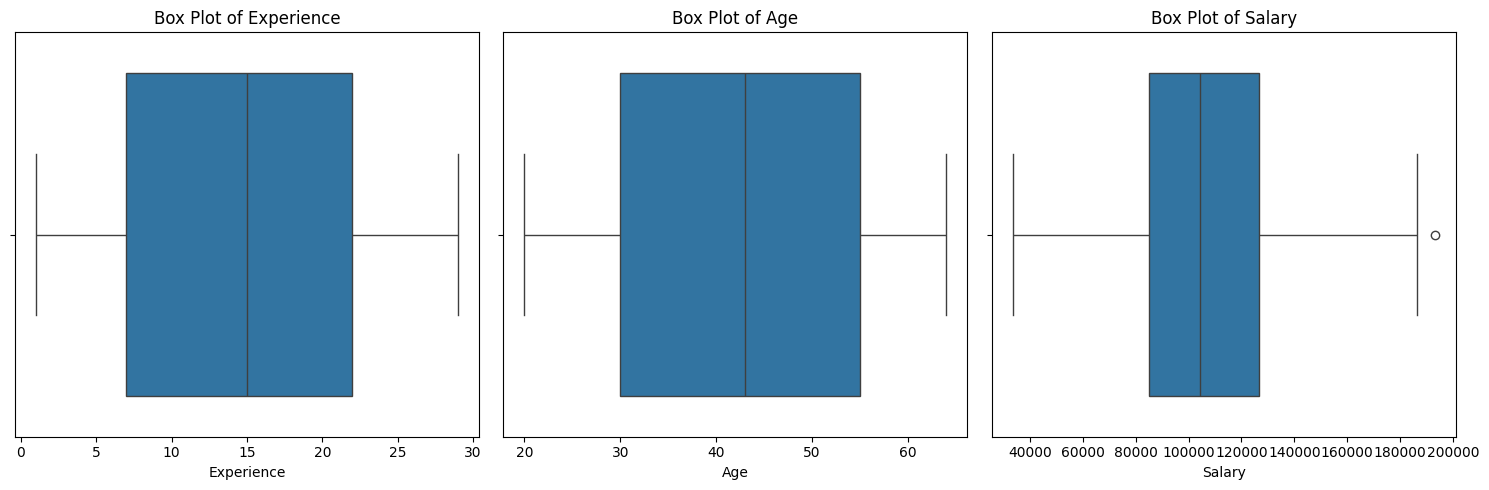

In [53]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

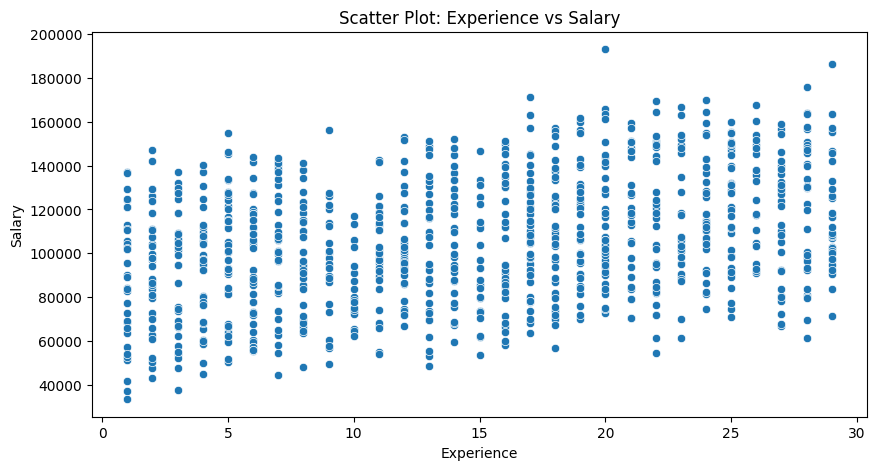

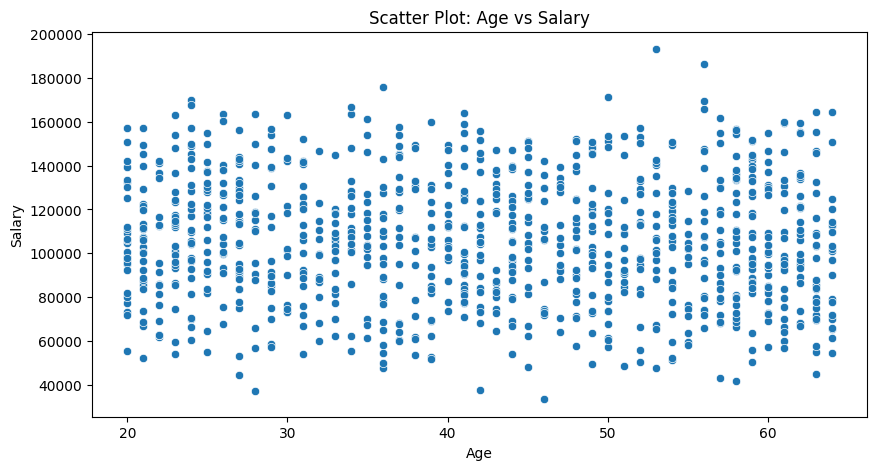

In [54]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Experience'], y=data['Salary'])
plt.title('Scatter Plot: Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['Age'], y=data['Salary'])
plt.title('Scatter Plot: Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Job_Title'] = label_encoder.fit_transform(data['Job_Title'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

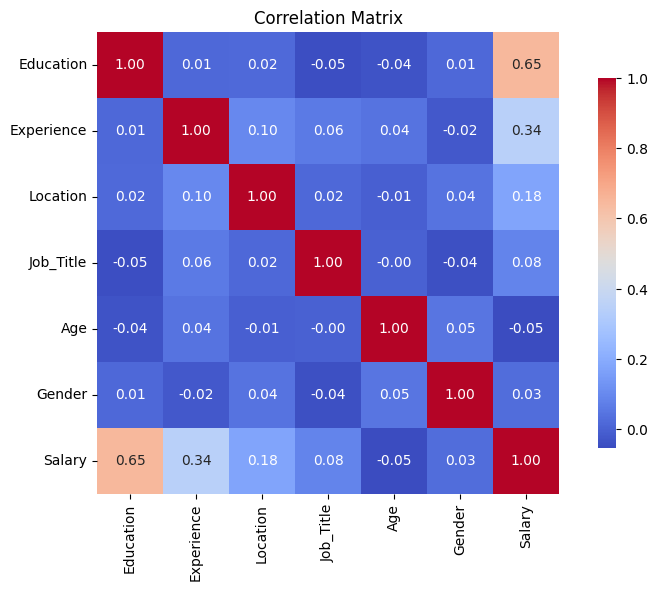

In [56]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix')
plt.show()

In [57]:
# Define features and target variable
X = data.drop('Salary', axis=1).values
y = data['Salary'].values

In [58]:
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        # Calculate theta using the Normal Equation
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a bias (intercept) term to the features
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
        return X_b.dot(self.theta)

    def mean_absolute_error(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def root_mean_squared_error(self, y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [59]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split ,  GridSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [60]:
# Evaluate the model on training data
mae_train = model.mean_absolute_error(y_train, y_train_pred)
rmse_train = model.root_mean_squared_error(y_train, y_train_pred)
r2_train = model.r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
mae_test = model.mean_absolute_error(y_test, y_test_pred)
rmse_test = model.root_mean_squared_error(y_test, y_test_pred)
r2_test = model.r2_score(y_test, y_test_pred)

# Print the results
print(f'Training Data - Mean Absolute Error: {mae_train:.2f}, RMSE: {rmse_train:.2f}, R-squared: {r2_train:.2f}')
print(f'Testing Data - Mean Absolute Error: {mae_test:.2f}, RMSE: {rmse_test:.2f}, R-squared: {r2_test:.2f}')

Training Data - Mean Absolute Error: 15037.89, RMSE: 18727.82, R-squared: 0.56
Testing Data - Mean Absolute Error: 15458.83, RMSE: 18813.89, R-squared: 0.57


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Make predictions on the training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on testing data
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Random Forest Regression Performance:")
print("Training Data:")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"Root Mean Squared Error: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}\n")

print("Testing Data:")
print(f"Mean Absolute Error: {mae_test:.2f}")
print(f"Root Mean Squared Error: {rmse_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Random Forest Regression Performance:
Training Data:
Mean Absolute Error: 3448.66
Root Mean Squared Error: 4327.02
R-squared: 0.98

Testing Data:
Mean Absolute Error: 9280.29
Root Mean Squared Error: 11272.81
R-squared: 0.84


In [64]:
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions on the training and test sets for Lasso
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

In [65]:
# Evaluate the Lasso model
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the evaluation metrics for Lasso Regression
print("Lasso Regression Performance:")
print("Training Data:")
print(f"Mean Absolute Error: {mae_train_lasso:.2f}")
print(f"Root Mean Squared Error: {rmse_train_lasso:.2f}")
print(f"R-squared: {r2_train_lasso:.2f}\n")

print("Testing Data:")
print(f"Mean Absolute Error: {mae_test_lasso:.2f}")
print(f"Root Mean Squared Error: {rmse_test_lasso:.2f}")
print(f"R-squared: {r2_test_lasso:.2f}")

Lasso Regression Performance:
Training Data:
Mean Absolute Error: 15037.89
Root Mean Squared Error: 18727.82
R-squared: 0.56

Testing Data:
Mean Absolute Error: 15458.83
Root Mean Squared Error: 18813.91
R-squared: 0.57


In [66]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print("Best Hyperparameters for Random Forest Regressor:")
print(best_rf_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [67]:
# Define the parameter grid
lasso_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid,
                                  scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV
lasso_grid_search.fit(X_train, y_train)

# Best parameters for Lasso
best_lasso_params = lasso_grid_search.best_params_
print("Best Hyperparameters for Lasso Regression:")
print(best_lasso_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Lasso Regression:
{'alpha': 100}


In [68]:
# Feature Selection with Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
rf_feature_importance_df = pd.DataFrame({
    'Feature': data.drop('Salary', axis=1).columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

Random Forest Feature Importances:
      Feature  Importance
0   Education    0.624428
1  Experience    0.154093
3   Job_Title    0.125997
4         Age    0.056828
2    Location    0.029984
5      Gender    0.008670


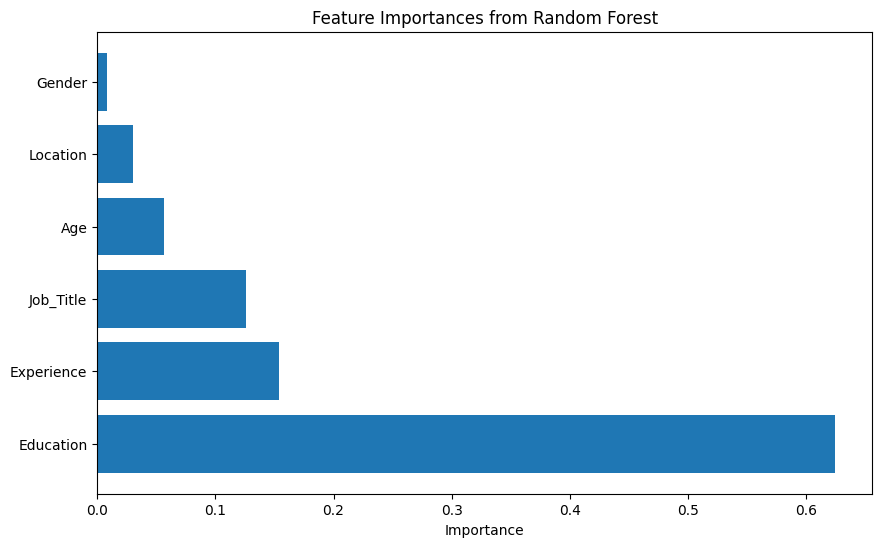

In [69]:
# Print the selected features based on Random Forest
print("Random Forest Feature Importances:")
print(rf_feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

In [70]:
# Feature Selection with Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Get the coefficients
lasso_coefficients = lasso_model.coef_

# Create a DataFrame for Lasso coefficients
lasso_feature_importance_df = pd.DataFrame({
    'Feature': data.drop('Salary', axis=1).columns,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

Lasso Regression Coefficients:
      Feature   Coefficient
0   Education  16707.163693
2    Location   4703.662604
3   Job_Title   1857.361035
1  Experience   1001.937897
5      Gender    603.302445
4         Age    -63.648547


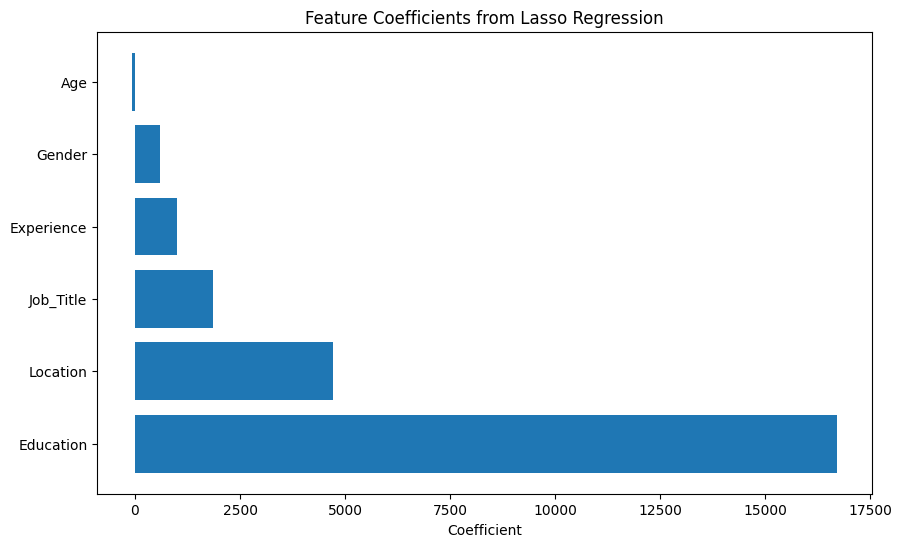

In [71]:
# Print the selected features based on Lasso Regression
print("Lasso Regression Coefficients:")
print(lasso_feature_importance_df)

# Plotting Lasso coefficients
plt.figure(figsize=(10, 6))
plt.barh(lasso_feature_importance_df['Feature'], lasso_feature_importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Coefficients from Lasso Regression')
plt.show()

In [72]:
# Rebuild Random Forest Regressor with optimal hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training and test sets for Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [73]:
# Evaluate the Random Forest model
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [74]:
# Print the evaluation metrics for Random Forest
print("Random Forest Regression Performance:")
print("Training Data:")
print(f"Mean Absolute Error: {mae_train_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_train_rf:.2f}")
print(f"R-squared: {r2_train_rf:.2f}\n")

print("Testing Data:")
print(f"Mean Absolute Error: {mae_test_rf:.2f}")
print(f"Root Mean Squared Error: {rmse_test_rf:.2f}")
print(f"R-squared: {r2_test_rf:.2f}\n")

Random Forest Regression Performance:
Training Data:
Mean Absolute Error: 3448.66
Root Mean Squared Error: 4327.02
R-squared: 0.98

Testing Data:
Mean Absolute Error: 9280.29
Root Mean Squared Error: 11272.81
R-squared: 0.84



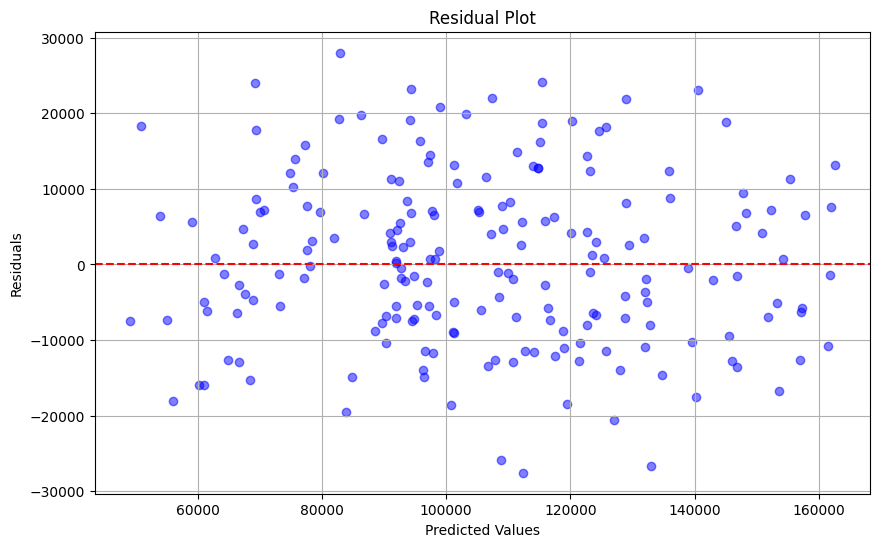

In [75]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()